## Simulate data to learn CNN classifier


In [1]:
import numpy as np
from numpy.dtypes import StringDType
from random import randint
import matplotlib.pyplot as plt
import os
from zootopia3 import *

dir = '../data'
if not os.path.exists(dir):
    os.makedirs(dir)


## Modify the training data parameters

- Change `file_suffix` to make different datasets
- `image_width` and `image_height` refer to the pixel sizes
- `min_x` and `max_x` refer to min and max of shape axis sizes
- `num_shape_examples` refers to how many of shape + color combo
- `magnitude` refers to how much color variation from a base RGB
- `shades` includes white and black if True
- Change `shape_names` if you wrote additional shape Python classes
- Change `colors_dict` if you want to increase the # of prediction classes

The resulting data in `../data/` will include
- `target_color_*.txt` the string names of shape color per image
- `target_shape_*.txt` the string names of the shape per image
- `target_rgb_*.npy` the RGB encoding for the colored shape per image
- `target_magnitude_*.npy` the random magnitude change in RGB encoding per image

In [2]:
file_suffix = 'small'

image_width = 224
image_height = 224
min_x = 10
max_x = 100
num_shape_examples = 2

magnitude = 50
shades = True

shape_names = [
    'diamond',
    'rectangle',
    'triangle',
    'circle',
]

colors_dict = {
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "purple": (255, 0, 255),
    "cyan": (0, 255, 255),
}

## Run the following two blocks

These simulate the data by invoking `simulate_shapes()` in the `zootopia3` package.

In [3]:
num_color = len(colors_dict)
if shades:
    num_color += 2
num_shape = len(shape_names)

num_each = num_shape_examples * num_color
num_examples = (num_each * num_shape)

# initialize big array
target_color = np.empty(num_examples, dtype=StringDType)
target_shape = np.empty(num_examples, dtype=StringDType)
target_magnitude = np.empty(num_examples, dtype=np.uint8)
target_rgb = np.empty((num_examples,3), dtype=np.uint8)
images = np.zeros(
    (num_examples,
        image_width,
        image_height,
        3,
    ),
    dtype = np.uint8
)

In [4]:
itr = 0

for shape_name in shape_names:

    sim_color, sim_shape, sim_images, sim_rgb, sim_magnitude = simulate_shapes(
        num_shape_examples,
        shape_name,
        image_width,
        image_height,
        min_x,
        max_x,
        colors_dict,
        magnitude,
        shades,
    )

    target_color[itr:itr+num_each] = sim_color
    target_shape[itr:itr+num_each] = sim_shape
    target_magnitude[itr:itr+num_each] = sim_magnitude
    target_rgb[itr:itr+num_each,] = sim_rgb
    images[itr:itr+num_each,] = sim_images

    itr += num_each


## Visualize some of the data

Run this to see how the parameters make the data more or less challenging to predict.

cyan triangle


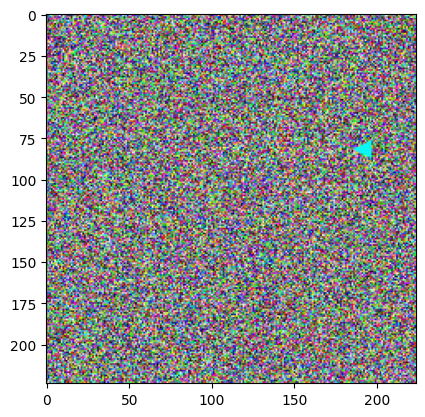

In [5]:
# plot examples
idx = randint(0, num_examples - 1)
print(f'{target_color[idx]} {target_shape[idx]}')
plt.imshow(images[idx])
plt.show()

## Saving the data

In [6]:
np.savetxt(f'../data/target_color_{file_suffix}.txt', target_color, fmt='%s')
np.savetxt(f'../data/target_shape_{file_suffix}.txt', target_shape, fmt='%s')
np.save(f'../data/images_{file_suffix}.npy', images)
np.save(f'../data/target_magnitude_{file_suffix}.npy', target_magnitude)
np.save(f'../data/target_rgb_{file_suffix}.npy', target_rgb)